In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot

In [2]:
df = pd.read_excel('~/Downloads/crime.xls')
df = df[['R', 'NW', 'ED']]

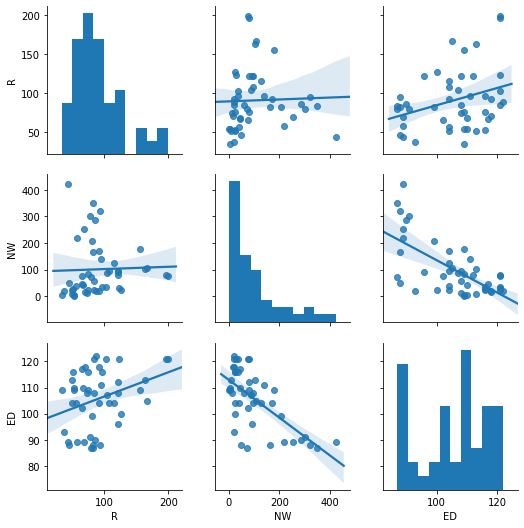

In [3]:
sns.pairplot(df, kind='reg')

In [4]:
X = df[['NW', 'ED']]
Y = df['R']
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()
results.summary()

/home/andrey/PycharmProjects/statlab/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      R   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     5.982
Date:                Sun, 01 Dec 2019   Prob (F-statistic):            0.00503
Time:                        20:56:11   Log-Likelihood:                -232.33
No. Observations:                  47   AIC:                             470.7
Df Residuals:                      44   BIC:                             476.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -151.8604     70.256     -2.162      0.036    -293.452     -10.269
NW             0.1667      0.067      2.476      0.017       0.031       0.302
ED             2.1348      0.619      3.450      0.001       0.888       3.382
==============================================================================
Omnibus:                        5.179   Durbin-Watson:                   2.625
Prob(Omnibus):                  0.075   Jarque-Bera (JB):                4.614
Skew:                           0.767   Prob(JB):                       0.0995
Kurtosis:                       3.044   Cond. No.                     2.25e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.25e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

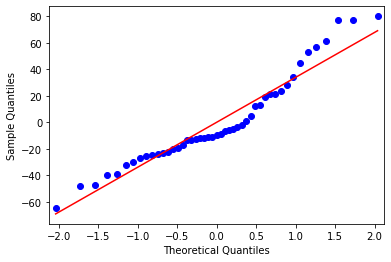

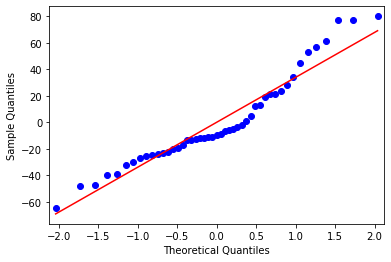

In [5]:
qqplot(results.resid, line='s')

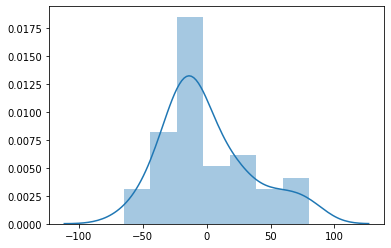

In [6]:
sns.distplot(results.resid)

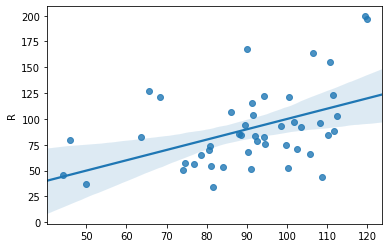

In [11]:
sns.regplot(results.fittedvalues, df['R'])

In [13]:
test = results.outlier_test()
outliers = test[test['unadj_p'] < 0.05]
outliers


,student_resid,unadj_p,bonf(p)
3,2.418358,0.019899,0.935235
10,2.343743,0.023783,1.000000
21,-2.222339,0.031571,1.000000
25,2.519998,0.015530,0.729887


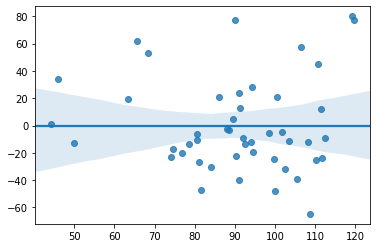

In [14]:
sns.regplot(results.fittedvalues, results.resid)